# Dispa-SET Post-processing

This Notebook illustrates how Dispa-SET simulation results can be loaded, analysed and plotted. It uses the functions provided within the PostProcessing.py file.

Sylvain Quoilin, Joint Research Centre

November 2016

### Load DispaSET and the required libraries:

In [1]:
%matplotlib inline
from __future__ import division
import sys
sys.path.append("..")  

import DispaSET as ds
import pandas as pd
import numpy as np

### Define the path to the simulation environment

The folder must contain the simulatin inputs (written by the pre-processing tool) as wall as the simulation results (Results.gdx).

In [2]:
path = '../Simulations/simulationWB_2015'

### Load the inputs and the results of the simulation

This can be computationally intensive for large simulations:

In [3]:
inputs,results = ds.get_sim_results(path=path,cache=True)

[WARNING ] (get_sim_results): The provided path for GAMS ( ) does not exist. Trying to locate...
[INFO    ] (get_gams_path): Detected C:\GAMS\win64\24.3 as GAMS path on this computer
[INFO    ] (gdx_to_list): Loading gdx file ..\Simulations\simulationWB_2015\Results.gdx took 2.99300003052s
[INFO    ] (gdx_to_dataframe): Time to convert to dataframes: 5.09500002861s


### Format the inputs as a dictionary of dataframes:

In [4]:
datain = ds.ds_to_df(inputs)

### Select the time period for plotting

In [28]:
rng = pd.DatetimeIndex(start='2015-06-01 00:00:00',end='2015-06-30 04:01:00',freq='h')

### Plotting the detailed analysis for one of the zones, randomly

In [31]:
Nzones = len(inputs['sets']['n'])
#c = inputs['sets']['n'][np.random.randint(Nzones)]
c = 'HR'
print('Randomly selected zone for the detailed analysis: '+ c)

Randomly selected zone for the detailed analysis: HR


### Generate plots

for the selected zone:
- dispatch plot (generation per fuel type) 
- rug  plog (ON/OFF status of each power plant 

True

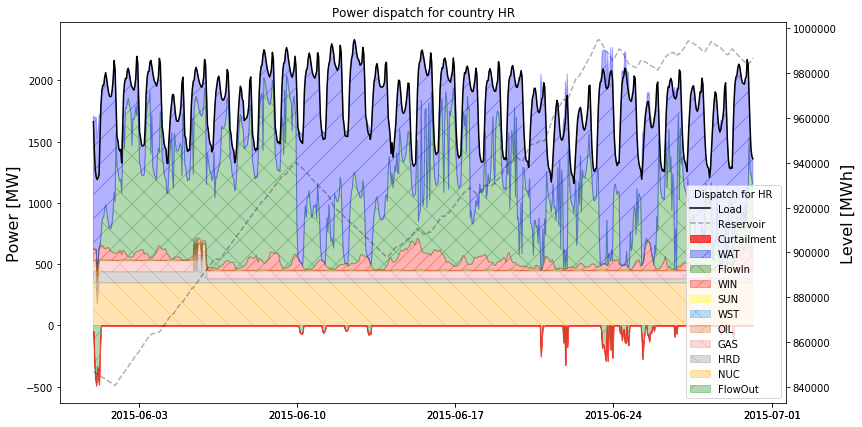

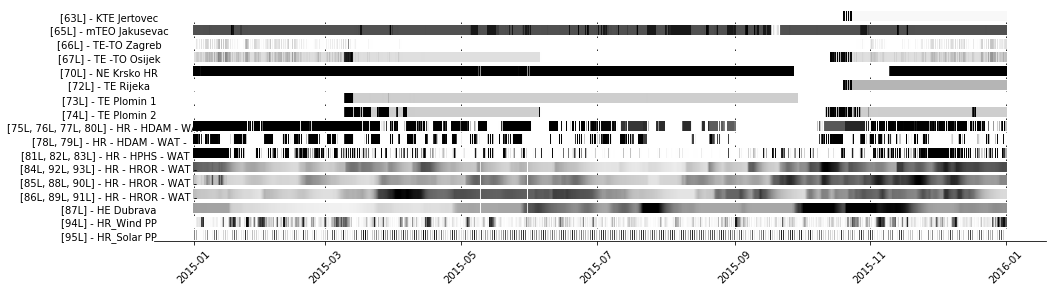

In [32]:
ds.plot_country(inputs,results,c,rng=rng)

### Analyse the results for each country and provide quantitative indicators:

In [8]:
r = ds.get_result_analysis(inputs,results)

[CRITICAL] (get_result_analysis): 
There is a significant amount of lost load for LostLoad_RampDown: 39111.58428220226 MWh. The results should be checked carefully



Average electricity cost : 45.76273339534956 EUR/MWh

Aggregated statistics for the considered area:
Total consumption:106.7999930811627 TWh
Peak load:18028.730413999998 MW
Net importations:7.977171084417001 TWh

Country-Specific values (in TWh or in MW):
       Demand     PeakLoad  NetImports  LoadShedding  Curtailment
AL   7.265398  1717.041023    0.151865           NaN          NaN
BA  12.365587  2105.000000   -4.089707           NaN          NaN
HR  17.191261  2950.000000    4.020061           NaN     0.003749
ME   3.418313   583.000000    0.231874           NaN          NaN
MK   7.838262  1439.000000    1.938623      0.000558          NaN
RS  39.504641  6879.000000    0.815489           NaN          NaN
SI  13.646245  2086.000000    4.817703           NaN     0.000028
XK   5.570285  1126.337716    0.091263           NaN          NaN

Number of hours of congestion on each line: 
{'AL -> ME': 1668,
 'AL -> XK': 2216,
 'BA -> HR': 1781,
 'BA -> ME': 1820,
 'BA -> RS': 1352,
 'HR -> 

### Plot the levels of all storage units:

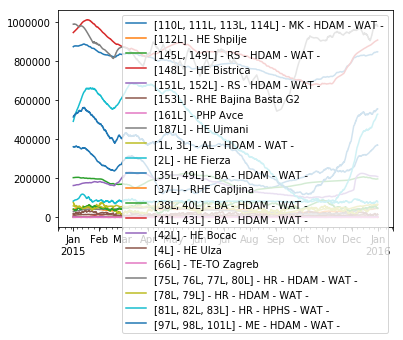

In [9]:
if 'OutputStorageLevel' in results:
    results['OutputStorageLevel'].plot()

### Bar plot of the overall generation in each zone by fuel type:

KeyError: 'param_df'

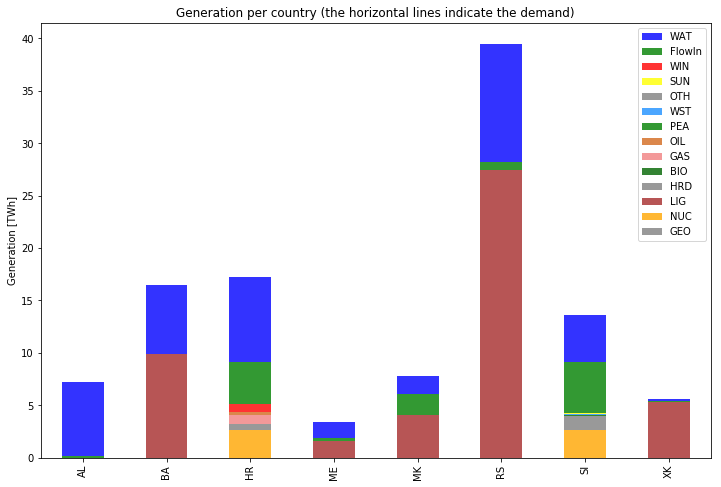

In [10]:
PPindicators = ds.get_indicators_powerplant(inputs,results)
ax = ds.plot_energy_country_fuel(datain,results,PPindicators)

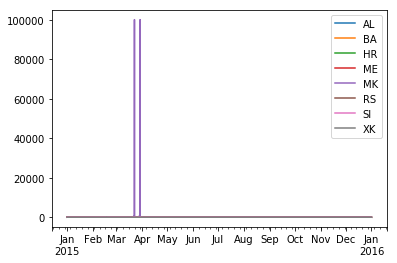

In [11]:
results['ShadowPrice'].plot()

In [12]:
inputs['units'].groupby(['Fuel']).sum()['PowerCapacity']

Fuel
BIO       81.7400
GAS     1606.8400
HRD     1083.0000
LIG     7419.0000
NUC      696.0000
OIL      797.0000
SUN      316.0100
WAT    11153.9435
WIN      424.0900
WST       10.2260
Name: PowerCapacity, dtype: float64

In [13]:
inputs['units']

,Unnamed: 0,PowerCapacity,Unit,Zone,Technology,Fuel,Efficiency,TimeUpMinimum,TimeDownMinimum,RampUpRate,...,EmissionRate,CHPType,CHPPowerToHeat,CHPPowerLossFactor,StorageCapacity,StorageSelfDischarge,StorageChargingCapacity,StorageChargingEfficiency,CHPMaxHeat,Nunits
[0L] - TE Vlora,0,98.0000,[0L] - TE Vlora,AL,COMC,OIL,0.600000,2,2,0.060,...,517.000,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
"[1L, 3L] - AL - HDAM - WAT -",1,850.0000,"[1L, 3L] - AL - HDAM - WAT -",AL,HDAM,WAT,0.866152,0,0,1.000,...,0.000,,NaN,NaN,86447.90,NaN,NaN,NaN,NaN,1
[2L] - HE Fierza,2,500.0000,[2L] - HE Fierza,AL,HDAM,WAT,0.925909,0,0,1.000,...,0.000,,NaN,NaN,739565.00,NaN,NaN,NaN,NaN,1
[4L] - HE Ulza,4,76.7000,[4L] - HE Ulza,AL,HDAM,WAT,0.737382,0,0,1.000,...,0.000,,NaN,NaN,18246.60,NaN,NaN,NaN,NaN,1
"[5L, 6L, 7L, 8L, 9L, ... - AL - HROR - WAT -",5,370.4900,"[5L, 6L, 7L, 8L, 9L, ... - AL - HROR - WAT -",AL,HROR,WAT,0.850000,0,0,1.000,...,0.000,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
[31L] - TE Tuzla,0,630.0000,[31L] - TE Tuzla,BA,STUR,LIG,0.341000,6,1,0.025,...,1.062,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
[32L] - TE Kakanj,1,385.0000,[32L] - TE Kakanj,BA,STUR,LIG,0.342000,6,1,0.025,...,1.062,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
[33L] - TE Ugljevik,2,264.0000,[33L] - TE Ugljevik,BA,STUR,LIG,0.340000,6,1,0.025,...,1.062,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
[34L] - TE Gacko,3,255.0000,[34L] - TE Gacko,BA,STUR,LIG,0.342000,6,1,0.025,...,1.062,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
"[35L, 49L] - BA - HDAM - WAT -",4,176.0000,"[35L, 49L] - BA - HDAM - WAT -",BA,HDAM,WAT,0.790740,0,0,1.000,...,0.000,,NaN,NaN,1016737.00,NaN,NaN,NaN,NaN,1
